## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import datetime

## Analyze text frequency

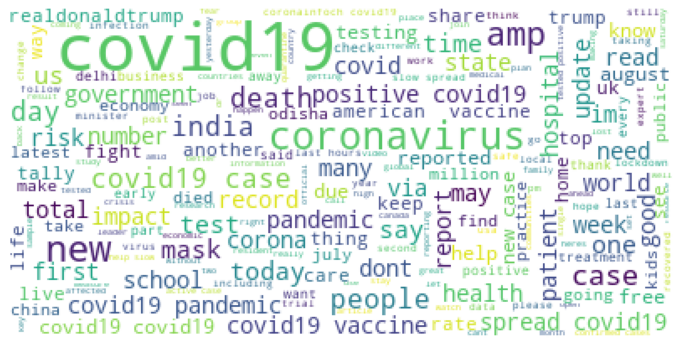

In [ ]:
data = pd.read_csv("data_country_random.csv")
# continuous_text = str(data['english_text']) # this one did not remove stopwords
# continuous_text = str(data['cleaned_text'])
continuous_text = "".join(i + " " for i in data.cleaned_text)

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
    ).generate(continuous_text)

fig = plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

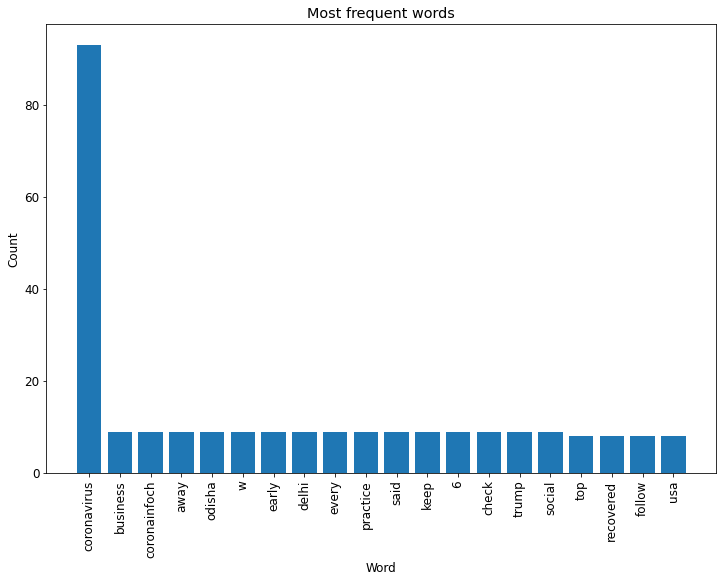

In [ ]:
wordlist = continuous_text.split()

wordfreq = {}
for w in wordlist:
    wordfreq[w] = wordlist.count(w)

words = []
frequencies = []
for key in wordfreq:
    words.append(key)
    frequencies.append(wordfreq[key])

wordfreq_np = np.array([words, frequencies])
wordfreq_np = np.flip(wordfreq_np.T[np.argsort(wordfreq_np[1])], axis=0)

plt.figure(figsize=(12,8))
plt.bar(range(20), wordfreq_np.T[1][:20].astype('int'))
plt.xticks(range(20), wordfreq_np.T[0][:20], rotation='vertical')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most frequent words')
plt.show()

# Tweet frequency over time

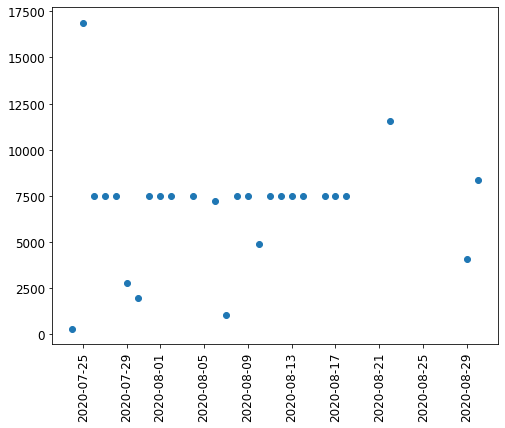

In [ ]:
dates = pd.read_csv('covid19_tweets.csv', usecols=['date'])['date'].values
frequencies = {}

for i in range(len(dates)):
    date_string = dates[i].split(' ')[0]
    if date_string in frequencies:
        frequencies[date_string] += 1
    else:
        frequencies[date_string] = 1

# dates_array = np.zeros(len(frequency_keys), dtype = 'datetime64')
# frequencies_array = np.zeros(len(frequency_keys))
# counter = 0
# for key in frequencies.keys():
#     print(np.datetime64(key))
#     dates_array[counter] = np.datetime64(key)
#     frequencies_array[counter] = frequencies[key]
#     counter += 1

plt_dates = np.array(list(frequencies.keys()), dtype = 'datetime64')
plt_frequencies = np.array(list(frequencies.values()))

plt.figure(figsize=(8,6))
plt.plot_date(plt_dates, plt_frequencies, xdate = True)
plt.xticks(rotation = 'vertical')
plt.show()

## Analyze embedded text

In [ ]:
embedded_text = np.load('vectorized.npy')

In [ ]:
pca = PCA(n_components=3)
reduced_text = pca.fit_transform(embedded_text)
print(reduced_text.shape)

(891, 3)


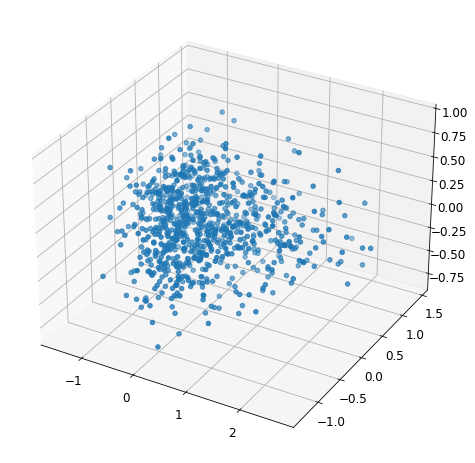

In [ ]:
reshaped_text = reduced_text.T

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(reshaped_text[0], reshaped_text[1], reshaped_text[2])
fig.show()